<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/TravelingWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convection in 1D

### Difference Approximations of First Order Derivatives

\begin{eqnarray}
u_{i+1} & = & u_i + \Delta x \frac{\partial u}{\partial x} \bigg|_i + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \bigg|_i + \frac{\Delta x^3}{6} \frac{\partial^3 u}{\partial x^3} \bigg|_i + \frac{\Delta x^4}{24} \frac{\partial^4 u}{\partial x^4} \bigg|_ih.o.t \\ 
u_{i-1} & = & u_i - \Delta x \frac{\partial u}{\partial x} \bigg|_i + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \bigg|_i - \frac{\Delta x^3}{6} \frac{\partial^3 u}{\partial x^3} \bigg|_i + \frac{\Delta x^4}{24} \frac{\partial^4 u}{\partial x^4} \bigg|_i h.o.t \\
\end{eqnarray}

#### Forward Difference Scheme:
\begin{equation}
\frac{\partial u}{\partial x}  =  \frac{u_{i+1} - u_i}{\Delta x} + \frac{\Delta x}{2}\frac{\partial^2 u}{\partial x^2} + h.o.t \\ 
\end{equation}
#### Backward Difference Scheme:
\begin{equation}
\frac{\partial u}{\partial x}  =  \frac{u_{i} - u_{i-1}}{\Delta x} - \frac{\Delta x}{2}\frac{\partial^2 u}{\partial x^2} + h.o.t \\ 
\end{equation}
#### Central Difference Scheme:
\begin{equation}
\frac{\partial u}{\partial x}  =  \frac{u_{i+1} - u_{i-1}}{2 \Delta x} - \frac{\Delta x^2}{6}\frac{\partial^3 u}{\partial x^3} + h.o.t \\ 
\end{equation}


### The 1D Convection Equation with Constant Wave Speed

\begin{equation}
\frac{\partial u}{\partial t} - c \frac{\partial u}{\partial x} = 0
\end{equation}

where $c$ is the speed of travel of the wave.  We begin by using the forward difference for the time derivative, and the backward difference approximation for the first order spatial derivative.  Why is this so?  Well, time moves $forward$, and so using the forward difference makes sense for the time derivative.  Using the backward difference approximation for the spatial derivative has some interesting consequences, which is what we are investigating here.

\begin{equation}
\frac{u_i^{n+1} -  u_i^n}{\Delta t} - c \left( \frac{u^n_{i} - u^n_{i-1}}{\Delta x} \right) = 0
\end{equation}

\begin{equation}
u_i^{n+1} =  u_i^n + \frac{c \Delta t}{\Delta x} \left( u^n_{i} - u^n_{i-1} \right)
\end{equation}

In [4]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
import time, sys                         #and load some utilities

In [5]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [6]:
# Consider a wave traveling to the right at 25 m/s.  We will consider the
# situation of the wave traveling from x=0.75m to x=16.375m.  This will take
# 0.625 seconds.  
#
# We define the x-axis to start at x=0.0m and end at x=20.0m.
# 
# We specify the number of steps in x (nx), and the number
# of steps in t (nt), and calculate dx and dt based on these choices.
#
# The crucial quantity is c*dt/dx, which must be less than or equal to 1
# in order to have any stable solution, and must be exactly equal to 1 for
# the correct (shape-conserving) solution.

xrange = 20.0
trange = 0.625
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 2001    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)
c = 25      #assume wavespeed of c = 25 m/s

x = np.linspace(0,xrange,nx)

print ("Stability criterion = ",c*dt/dx)

Stability criterion =  0.15625


In [7]:
# Set the wavefunction equal to all ones, initially
u = np.ones(nx)      #numpy function ones()

# Test Case 1: Square Pulse
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1
u[int(1 / dx):int(1.5 / dx + 1)] = 0  #setting u = 0 between 1 and 1.5

# Test Case 2:  Gaussian Pulse
#mu = 0.75
#sigma = 0.25
#for i in range(len(u)):
#  u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)


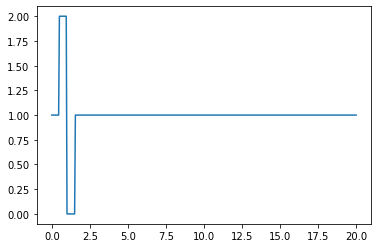

In [8]:
plt.plot(x, u);

In [9]:
un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

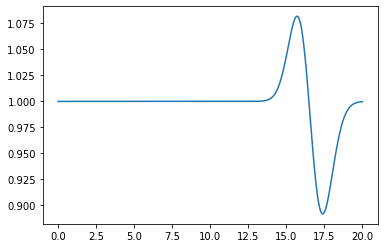

In [10]:
plt.plot(x, u);

Stability criterion =  1.0
nt_min =  311.0


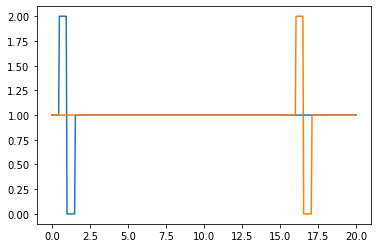

In [11]:
xrange = 20.0
trange = 0.620
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 311    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)
c = 25      #assume wavespeed of c = 25 m/s

print ("Stability criterion = ",c*dt/dx)
print ("nt_min = ",c*trange/xrange*(nx-1)+1)

u = np.ones(nx)      #numpy function ones()
x = np.linspace(0, xrange, nx)

# Test Case 1: Square Puls
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
u[int(1 / dx):int(1.5 / dx + 1)] = 0  #setting u = 0 between 1 and 1.5 as per our I.C.s

# Test Case 2:  Gaussian Pulse
#mu = 0.75
#sigma = 0.25
#for i in range(len(u)):
#  u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)

plt.plot(x, u);

un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

plt.plot(x, u)

Stability criterion =  1.0
nt_min =  311.0


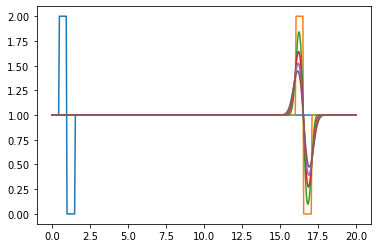

In [12]:
xrange = 20.0
trange = 0.620
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 311    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)
c = 25      #assume wavespeed of c = 25 m/s

print ("Stability criterion = ",c*dt/dx)
print ("nt_min = ",c*trange/xrange*(nx-1)+1)

u = np.ones(nx)      #numpy function ones()
x = np.linspace(0, xrange, nx)

# Test Case 1: Square Puls
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
u[int(1 / dx):int(1.5 / dx + 1)] = 0  #setting u = 0 between 1 and 1.5 as per our I.C.s

# Test Case 2:  Gaussian Pulse
#mu = 0.75
#sigma = 0.25
#for i in range(len(u)):
#  u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)

plt.plot(x, u);

un = np.ones(nx) #initialize a temporary array

for ntt in range(nt,nt+41,10):
    
    u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    u[int(1 / dx):int(1.5 / dx + 1)] = 0  #setting u = 0 between 1 and 1.5 as per our I.C.s
    
    for n in range(ntt):  #loop for values of n from 0 to nt, so it will run nt times
        dt = trange/ (ntt-1)
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx): ## you can try commenting this line and...
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

    plt.plot(x, u)

Stability criterion =  0.0775
nt_min =  156.0


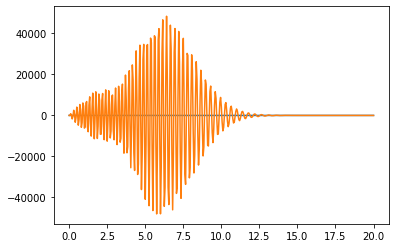

In [21]:
xrange = 20.0
trange = 0.620
nx = 401  # try changing this number from 41 to 81 and Run All ... what happens?
dx = xrange / (nx-1)
nt = 2001    #nt is the number of timesteps we want to calculate
dt = trange/ (nt-1)  #dt is the amount of time each timestep covers (delta t)
c = 25    #assume wavespeed of c = 25 m/s

print ("Stability criterion = ",c*dt/(2.0*dx))
print ("nt_min = ",c*trange/(2*xrange)*(nx-1)+1)

u = np.ones(nx)      #numpy function ones()
x = np.linspace(0, xrange, nx)

# Test Case 1: Square Puls
#u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
#u[int(1 / dx):int(1.5 / dx + 1)] = 0  #setting u = 0 between 1 and 1.5 as per our I.C.s

# Test Case 2:  Gaussian Pulse
mu = 0.75
sigma = 0.25
for i in range(len(u)):
   u[i]=u[i]+np.exp(-1.0*(x[i]-mu)**2/sigma**2)

plt.plot(x, u);

un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] - c * dt / (2.0*dx) * (un[i+1] - un[i-1])

plt.plot(x, u)